In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**importing libraries**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/ML_TRAINING/Dataset/Assignment dog breed dataset/train",
                                          target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory("/content/drive/MyDrive/ML_TRAINING/Dataset/Assignment dog breed dataset/test",
                                          target_size=(64,64),batch_size=32,class_mode="categorical")

Found 1007 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [6]:
nb_train_samples = 1007
nb_validation_samples = 80
batch_size=32

In [7]:
print(x_train.class_indices)

{'African Wild Dog': 0, 'Boxer': 1, 'Bulldog': 2, 'Cocker': 3, 'Collie': 4, 'Golden Retriever': 5, 'Groenendael': 6, 'Pomeranian': 7}


**Building model**

In [8]:
model=Sequential()
#adding convolution layer, max pooling layer, Flatten layer,hidden layer, output layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten()) 
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=8,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1

**configure the learning process**

In [10]:

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
model.fit(x_train,steps_per_epoch=nb_train_samples // batch_size, epochs=30,validation_data=x_test,validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
31/31 [==============================] - 6s 149ms/step - loss: 2.0464 - accuracy: 0.1990 - val_loss: 1.9619 - val_accuracy: 0.2500
Epoch 2/30
31/31 [==============================] - 4s 141ms/step - loss: 1.8788 - accuracy: 0.2913 - val_loss: 1.7800 - val_accuracy: 0.3438
Epoch 3/30
31/31 [==============================] - 4s 141ms/step - loss: 1.6695 - accuracy: 0.3949 - val_loss: 1.6283 - val_accuracy: 0.2812
Epoch 4/30
31/31 [==============================] - 4s 142ms/step - loss: 1.5776 - accuracy: 0.4154 - val_loss: 1.6113 - val_accuracy: 0.4062
Epoch 5/30
31/31 [==============================] - 4s 142ms/step - loss: 1.4881 - accuracy: 0.4415 - val_loss: 1.4397 - val_accuracy: 0.4844
Epoch 6/30
31/31 [==============================] - 5s 147ms/step - loss: 1.4336 - accuracy: 0.4708 - val_loss: 1.3713 - val_accuracy: 0.5000
Epoch 7/30
31/31 [==============================] - 5s 146ms/step - loss: 1.3445 - accuracy: 0.5231 - val_loss: 1.4346 - val_accuracy: 0.4531
Epoch 

**Save the model**

In [12]:
model.save("dog_breed.h5")

**Testing the model**

In [13]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [14]:
model=load_model("dog_breed.h5")

In [15]:
img=image.load_img("/content/drive/MyDrive/ML_TRAINING/Dataset/Assignment dog breed dataset/valid/African Wild Dog/03.jpg",target_size=(64,64))

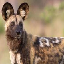

In [16]:
img

In [17]:
x=image.img_to_array(img)

In [18]:
x

array([[[212., 177., 155.],
        [218., 186., 165.],
        [215., 183., 160.],
        ...,
        [153., 127., 114.],
        [151., 133., 111.],
        [151., 135., 110.]],

       [[212., 177., 157.],
        [220., 185., 166.],
        [220., 185., 163.],
        ...,
        [161., 139., 116.],
        [159., 144., 113.],
        [161., 148., 114.]],

       [[211., 176., 157.],
        [220., 185., 166.],
        [220., 185., 165.],
        ...,
        [163., 148., 115.],
        [163., 154., 111.],
        [166., 157., 114.]],

       ...,

       [[211., 188., 154.],
        [210., 192., 152.],
        [209., 194., 151.],
        ...,
        [ 96.,  85.,  83.],
        [104.,  93.,  91.],
        [ 72.,  61.,  57.]],

       [[210., 190., 155.],
        [211., 193., 155.],
        [209., 194., 153.],
        ...,
        [119., 110., 105.],
        [118., 107., 105.],
        [ 84.,  73.,  67.]],

       [[212., 192., 155.],
        [213., 195., 159.],
        [211., 1

In [19]:
x.shape

(64, 64, 3)

In [20]:
x=np.expand_dims(x,axis=0)

In [21]:
x.shape

(1, 64, 64, 3)

In [22]:
y=model.predict(x)
pred=np.argmax(y, axis=1)

In [23]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
pred

array([0])

In [25]:
x_train.class_indices

{'African Wild Dog': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Cocker': 3,
 'Collie': 4,
 'Golden Retriever': 5,
 'Groenendael': 6,
 'Pomeranian': 7}

In [26]:
index=['African Wild Dog', 'Boxer', 'Bulldog', 'Cocker', 'Collie','Golden Retriever','Groenendael','Pomeranian']
breed_result=str(index[pred[0]])

In [27]:
breed_result

'African Wild Dog'